In [46]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [47]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
#descarga las tablas y las almacena en la variable cat
def dow(url,cat):
    
    for i in range(len(url)):
        html = requests.get(url[i]).content
        x_list = pd.read_html(html,header=-1)
        x = x_list[0]
        cat.append(x[4:])

In [49]:
#hace una grafica de barras comparandolas por años
#what son los datos, name es el nombre de cada dato
def barritas(what,name):
    
    width=0.8/len(what)
    fig, ax = plt.subplots()
#     plt.figure(figsize=(15,8))
    for i in range(len(what)):
        ax.bar(cat[0]['year'] - width/2 + width*i, 100*what[i], width ,label=name[i])

#    plt.title(title)
    plt.grid()
    plt.legend()
    plt.xlabel('Año')
    plt.ylabel('% de la población')
    plt.show()

In [50]:
#Calcula la mediana
def median(data):
    n = len(data)
    index = n // 2
    
    if n % 2:
        return sorted(data)[index]
    
    return sum(sorted(data)[index - 1:index + 1]) / 2

# Readme

In [51]:
html = requests.get('https://github.com/resbaz/data/blob/master/marriage/README.md').content
x_list = pd.read_html(html,header=-1)
x = x_list[0]
x

,Header,Description
0,all,Total (or all men/women in sex-specific files)
1,HS,High school graduate or less (EDUCD < 65)
2,SC,Some college (EDUCD >= 65 & <= 100)
3,BAp,Bachelor's degree or more (EDUCD > 100)
4,BAo,"Bachelor's degree, no graduate degre (EDUCD > ..."
5,GD,Graduate degree (EDUCD > 113)
6,White,Non-Hispanic white
7,Black,Black or African-American
8,Hisp,Hispanic of any race
9,NE,New England (REGION == 11)


In [52]:
#tablas de datos que se van a analizar
#both sexes, divorces,men, women
url = ['https://github.com/resbaz/data/blob/master/marriage/both_sexes.csv',
      'https://github.com/resbaz/data/blob/master/marriage/divorce.csv',
      'https://github.com/resbaz/data/blob/master/marriage/men.csv',
      'https://github.com/resbaz/data/blob/master/marriage/women.csv'
      ]

cat = []


In [53]:
dow(url,cat)

# Plots

In [54]:
#De las tablas precargadas utilizaré los datos de 35 a 44 años 
# excepto para comparar la situación laboral que utilizare de 25 a 34 años.

#Los datos representan el índice con respecto a la población total de esa edad.

#los nombres de las columnas estan escritos como: clave_edades. 
#ej. Para todos de 25 a 34 años: all_2534 

1- ¿Cómo es el índice de divorcios contra el de matrimonios?

In [ ]:
what = [cat[0]['all_3544'],cat[1]['all_3544']]
name = ['Marriages','Divorces']

barritas(what,name)

ratio = cat[0]['all_3544']/cat[1]['all_3544']
# ratio

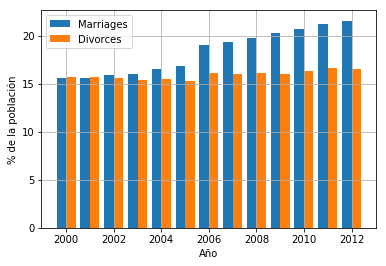

4     0.995013
5     0.994399
6     1.020242
7     1.045863
8     1.066639
9     1.102508
10    1.175078
11    1.205842
12    1.231200
13    1.265086
14    1.265965
15    1.276170
16    1.305348
Name: all_3544, dtype: float64

In [90]:
what = [cat[0]['all_3544'],cat[1]['all_3544']]
name = ['Marriages','Divorces']

barritas(what,name)

ratio = cat[0]['all_3544']/cat[1]['all_3544']
# ratio = pd.DataFrame(ratio, index=cat[0]['year'])
ratio

2- Comparar matrimonios por clase social

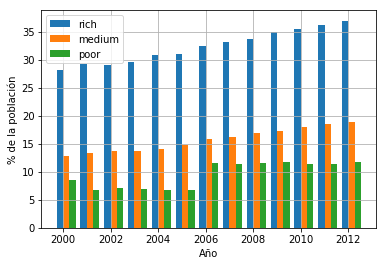

In [56]:
what = [cat[0]['poor_3544'],cat[0]['mid_3544'],cat[0]['rich_3544']]
name = ['rich','medium','poor']

barritas(what,name)

3- Comparar número de matrimonios divorcios con el nivel escolar

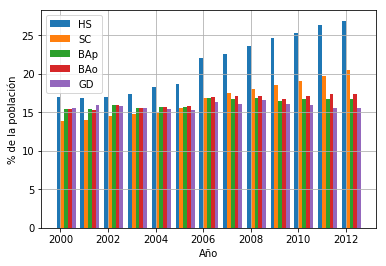

In [57]:
what = [cat[0]['HS_3544'],cat[0]['SC_3544'], cat[0]['BAp_3544'], cat[0]['BAo_3544'], cat[0]['GD_3544']]
name = ['HS', 'SC', 'BAp', 'BAo', 'GD']

barritas(what,name)

4- Comparar hombres contra mujeres

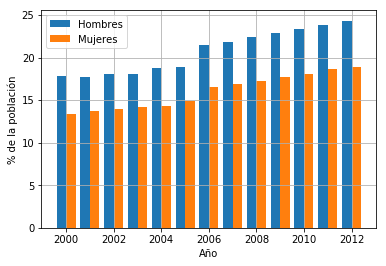

In [58]:
what = [cat[2]['all_3544'],cat[3]['all_3544']]
name = ['Hombres','Mujeres']

barritas(what,name)

5- Comparar por raza

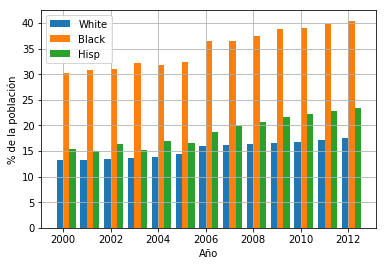

In [59]:
what = [cat[0]['White_3544'], cat[0]['Black_3544'], cat[0]['Hisp_3544']]
name = ['White', 'Black', 'Hisp']

barritas(what,name)

8- Comparar matrimonios por situación laboral

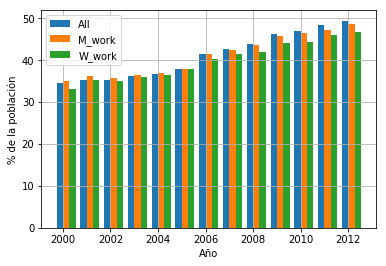

In [60]:
what = [cat[0]['all_2534'], cat[2]['work_2534'], cat[3]['work_2534']]
name = ['All', 'M_work','W_work']

barritas(what,name)

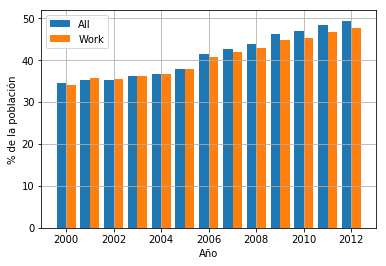

In [61]:
what = [cat[0]['all_2534'], (cat[2]['work_2534']+ cat[3]['work_2534'])/2]
name = ['All', 'Work']

barritas(what,name)

6- Identificar el año con más bodas, menos bodas, más divorcios, menos divorcios.

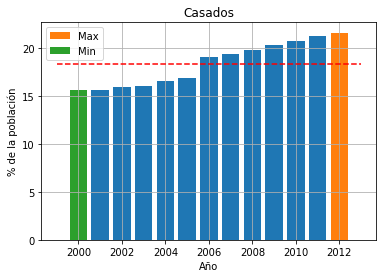

In [87]:
x=cat[0]['all_3544'][cat[0]['all_3544']==max(cat[0]['all_3544'])]
ma=x.keys()
x=cat[0]['all_3544'][cat[0]['all_3544']==min(cat[0]['all_3544'])]
mi=x.keys()

prom=100*sum(cat[0]['all_3544']) / len(cat[0]['all_3544'])

plt.bar(cat[0]['year'],100*cat[0]['all_3544'])
plt.bar(cat[0]['year'][ma],100*max(cat[0]['all_3544']), label='Max')
plt.bar(cat[0]['year'][mi],100*min(cat[0]['all_3544']), label='Min')
plt.plot([1999,2013],[prom,prom],'--',color='red')
plt.title('Casados')
plt.grid()
plt.legend()
plt.xlabel('Año')
plt.ylabel('% de la población')
plt.show()

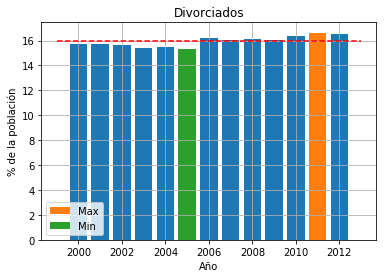

In [88]:
x=cat[1]['all_3544'][cat[1]['all_3544']==max(cat[1]['all_3544'])]
ma=x.keys()
x=cat[1]['all_3544'][cat[1]['all_3544']==min(cat[1]['all_3544'])]
mi=x.keys()

prom=100*sum(cat[1]['all_3544']) / len(cat[1]['all_3544'])

plt.bar(cat[1]['year'],100*cat[1]['all_3544'])
plt.bar(cat[1]['year'][ma],100*max(cat[1]['all_3544']), label='Max')
plt.bar(cat[1]['year'][mi],100*min(cat[1]['all_3544']), label='Min')
plt.plot([1999,2013],[prom,prom],'--',color='red')
plt.title('Divorciados')
plt.grid()
plt.legend()
plt.xlabel('Año')
plt.ylabel('% de la población')
plt.show()

7-media, mediana y moda de matrimonios/divorcios a lo largo de los años

In [83]:
print('Casados')
#Promedio
print('Promedio',100*sum(cat[0]['all_3544']) / len(cat[0]['all_3544']))
#Mediana
print('Mediana',100*median(cat[0]['all_3544']))

Casados
Promedio 18.36483749297762
Mediana 19.0233194660955


In [84]:
cat[0]['all_3544'].describe()

count    13.000000
mean      0.183648
std       0.022941
min       0.156059
25%       0.160899
50%       0.190233
75%       0.203038
max       0.216017
Name: all_3544, dtype: float64

In [65]:
print('Divorciados')
#Promedio
print('Promedio',100*sum(cat[1]['all_3544']) / len(cat[1]['all_3544']))
#Mediana
print('Mediana',100*median(cat[1]['all_3544']))

Divorciados
Promedio 15.936238344434374
Mediana 16.0468871507897


In [69]:
cat[1]['all_3544'].describe()

count    13.000000
mean      0.159362
std       0.004352
min       0.152920
25%       0.156508
50%       0.160469
75%       0.161890
max       0.166303
Name: all_3544, dtype: float64

In [91]:
cat[0]

,Unnamed: 0,Unnamed: 1,year,date,all_2534,HS_2534,SC_2534,BAp_2534,BAo_2534,GD_2534,...,kids_SC_2534,kids_BAp_2534,kids_BAo_2534,kids_GD_2534,nokids_poor_2534,nokids_mid_2534,nokids_rich_2534,kids_poor_2534,kids_mid_2534,kids_rich_2534
4,NaN,5,2000,2000-01-01,0.345009,0.331655,0.324921,0.387491,0.393958,0.369174,...,0.097625,0.037002,0.040101,0.027615,0.705545,0.569023,0.445802,0.256282,0.059785,0.029564
5,NaN,6,2001,2001-01-01,0.352777,0.344607,0.334110,0.383569,0.392515,0.359030,...,0.110031,0.039980,0.044584,0.026450,0.714733,0.586474,0.446111,0.280146,0.067795,0.033654
6,NaN,7,2002,2002-01-01,0.353525,0.349037,0.336160,0.377433,0.387084,0.351285,...,0.122975,0.040139,0.045616,0.024765,0.718467,0.582835,0.451421,0.285886,0.071385,0.032093
7,NaN,8,2003,2003-01-01,0.362035,0.358188,0.341893,0.387381,0.400004,0.353813,...,0.121568,0.046566,0.051983,0.032362,0.726908,0.595961,0.452032,0.292613,0.075946,0.029371
8,NaN,9,2004,2004-01-01,0.367325,0.370810,0.345075,0.384736,0.397612,0.351773,...,0.120966,0.047564,0.052674,0.034154,0.732716,0.599756,0.456414,0.306080,0.080352,0.032626
9,NaN,10,2005,2005-01-01,0.379345,0.387068,0.359666,0.388610,0.402912,0.351425,...,0.129909,0.045798,0.050996,0.032117,0.737549,0.608968,0.471279,0.323611,0.085249,0.031326
10,NaN,11,2006,2006-01-01,0.414766,0.431216,0.391218,0.414796,0.429867,0.375723,...,0.142473,0.053935,0.060030,0.038167,0.746882,0.624799,0.550633,0.340848,0.093423,0.038542
11,NaN,12,2007,2007-01-01,0.426922,0.444139,0.408493,0.420959,0.438975,0.375276,...,0.155116,0.058148,0.065655,0.039503,0.765397,0.638030,0.562454,0.351410,0.099153,0.041134
12,NaN,13,2008,2008-01-01,0.439441,0.459916,0.423509,0.429751,0.447357,0.384974,...,0.164814,0.056681,0.064701,0.036277,0.774938,0.652362,0.574009,0.370663,0.103536,0.042152
13,NaN,14,2009,2009-01-01,0.462564,0.484502,0.446994,0.451814,0.474377,0.395694,...,0.179636,0.061046,0.070550,0.038603,0.791970,0.673772,0.582799,0.380555,0.113019,0.044445
